In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Amazon-Products.csv")

In [5]:
df.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


In [6]:
df.main_category.unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

In [7]:
df.sub_category.value_counts()

Shirts                     19200
Sports Shoes               19200
Jeans                      19200
Western Wear               19200
Men's Fashion              19200
                           ...  
STEM Toys Store               48
Fashion Sales & Deals         44
Toys Gifting Store            24
International Toy Store       24
Refurbished & Open Box        24
Name: sub_category, Length: 112, dtype: int64

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [9]:
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [10]:
numeric_cols=['ratings','no_of_ratings', 'discount_price', 'actual_price']

In [11]:
df.main_category.value_counts()

accessories                116141
men's clothing              76656
women's clothing            76512
tv, audio & cameras         68659
men's shoes                 57456
appliances                  33096
stores                      32903
home & kitchen              14568
kids' fashion               13488
sports & fitness            12648
bags & luggage              10416
beauty & health             10122
car & motorbike              7080
toys & baby products         6216
women's shoes                5472
industrial supplies          4104
grocery & gourmet foods      3312
pet supplies                 1632
music                        1080
home, kitchen, pets            24
Name: main_category, dtype: int64

In [12]:
df_without_na=df.groupby(["main_category","sub_category"]).count()
df_without_na

name  image   link  ratings  \
main_category    sub_category                                               
accessories      Bags & Luggage              19152  19152  19152    16722   
                 Fashion & Silver Jewellery  19104  19104  19104    15747   
                 Gold & Diamond Jewellery    19104  19104  19104     1621   
                 Handbags & Clutches         19104  19104  19104    13404   
                 Jewellery                   19152  19152  19152    11928   
...                                            ...    ...    ...      ...   
women's clothing Lingerie & Nightwear        19104  19104  19104    14719   
                 Western Wear                19200  19200  19200    15647   
women's shoes    Ballerinas                   1392   1392   1392      481   
                 Fashion Sandals              2208   2208   2208      953   
                 Shoes                        1872   1872   1872     1429   

                                             no_of_ratings  discount_price  \
main_category    sub_category                                                
accessories      Bags & Luggage                      16722           18283   
                 Fashion & Silver Jewellery          15747           18678   
                 Gold & Diamond Jewellery             1621           15500   
                 Handbags & Clutches                 13404           17741   
                 Jewellery                           11928           18508   
...                                                    ...             ...   
women's clothing Lingerie & Nightwear                14719           17265   
                 Western Wear                        15647           18021   
women's shoes    Ballerinas                            481             919   
                 Fashion Sandals                       953            1899   
                 Shoes                                1429            1647   

                                             actual_price  
main_category    sub_category                              
accessories      Bags & Luggage                     19000  
                 Fashion & Silver Jewellery         18886  
                 Gold & Diamond Jewellery           15743  
                 Handbags & Clutches                18796  
                 Jewellery                          18827  
...                                                   ...  
women's clothing Lingerie & Nightwear               18995  
                 Western Wear                       19015  
women's shoes    Ballerinas                          1285  
                 Fashion Sandals                     2133  
                 Shoes                               1839  

[112 rows x 7 columns]

In [13]:
df.isna().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [14]:
df_na=df[df.ratings.isna() | df.no_of_ratings.isna() | df.discount_price.isna() | df.actual_price.isna()].groupby(["main_category","sub_category"]).count()
df_na

name  image   link  ratings  \
main_category    sub_category                                               
accessories      Bags & Luggage               3178   3178   3178      748   
                 Fashion & Silver Jewellery   3677   3677   3677      320   
                 Gold & Diamond Jewellery    17957  17957  17957      474   
                 Handbags & Clutches          6568   6568   6568      868   
                 Jewellery                    7594   7594   7594      370   
...                                            ...    ...    ...      ...   
women's clothing Lingerie & Nightwear         5824   5824   5824     1439   
                 Western Wear                 4444   4444   4444      891   
women's shoes    Ballerinas                   1042   1042   1042      131   
                 Fashion Sandals              1372   1372   1372      117   
                 Shoes                         601    601    601      158   

                                             no_of_ratings  discount_price  \
main_category    sub_category                                                
accessories      Bags & Luggage                        748            2309   
                 Fashion & Silver Jewellery            320            3251   
                 Gold & Diamond Jewellery              474           14353   
                 Handbags & Clutches                   868            5205   
                 Jewellery                             370            6950   
...                                                    ...             ...   
women's clothing Lingerie & Nightwear                 1439            3985   
                 Western Wear                          891            3265   
women's shoes    Ballerinas                            131             569   
                 Fashion Sandals                       117            1063   
                 Shoes                                 158             376   

                                             actual_price  
main_category    sub_category                              
accessories      Bags & Luggage                      3026  
                 Fashion & Silver Jewellery          3459  
                 Gold & Diamond Jewellery           14596  
                 Handbags & Clutches                 6260  
                 Jewellery                           7269  
...                                                   ...  
women's clothing Lingerie & Nightwear                5715  
                 Western Wear                        4259  
women's shoes    Ballerinas                           935  
                 Fashion Sandals                     1297  
                 Shoes                                568  

[112 rows x 7 columns]

In [15]:
df.shape

(551585, 9)

In [16]:
df_na.rename(columns={"name":"null_values"},inplace=True)
df_without_na.rename(columns={"name":"total_values"},inplace=True)

In [17]:
compare_df=df_without_na.join(df_na,on=["main_category","sub_category"],rsuffix="_null")
compare_df.head()

total_values  image   link  ratings  \
main_category sub_category                                                      
accessories   Bags & Luggage                     19152  19152  19152    16722   
              Fashion & Silver Jewellery         19104  19104  19104    15747   
              Gold & Diamond Jewellery           19104  19104  19104     1621   
              Handbags & Clutches                19104  19104  19104    13404   
              Jewellery                          19152  19152  19152    11928   

                                          no_of_ratings  discount_price  \
main_category sub_category                                                
accessories   Bags & Luggage                      16722           18283   
              Fashion & Silver Jewellery          15747           18678   
              Gold & Diamond Jewellery             1621           15500   
              Handbags & Clutches                 13404           17741   
              Jewellery                           11928           18508   

                                          actual_price  null_values  \
main_category sub_category                                            
accessories   Bags & Luggage                     19000         3178   
              Fashion & Silver Jewellery         18886         3677   
              Gold & Diamond Jewellery           15743        17957   
              Handbags & Clutches                18796         6568   
              Jewellery                          18827         7594   

                                          image_null  link_null  ratings_null  \
main_category sub_category                                                      
accessories   Bags & Luggage                    3178       3178           748   
              Fashion & Silver Jewellery        3677       3677           320   
              Gold & Diamond Jewellery         17957      17957           474   
              Handbags & Clutches               6568       6568           868   
              Jewellery                         7594       7594           370   

                                          no_of_ratings_null  \
main_category sub_category                                     
accessories   Bags & Luggage                             748   
              Fashion & Silver Jewellery                 320   
              Gold & Diamond Jewellery                   474   
              Handbags & Clutches                        868   
              Jewellery                                  370   

                                          discount_price_null  \
main_category sub_category                                      
accessories   Bags & Luggage                             2309   
              Fashion & Silver Jewellery                 3251   
              Gold & Diamond Jewellery                  14353   
              Handbags & Clutches                        5205   
              Jewellery                                  6950   

                                          actual_price_null  
main_category sub_category                                   
accessories   Bags & Luggage                           3026  
              Fashion & Silver Jewellery               3459  
              Gold & Diamond Jewellery                14596  
              Handbags & Clutches                      6260  
              Jewellery                                7269

In [18]:
compare_df[["total_values","null_values"]]

total_values  null_values
main_category    sub_category                                         
accessories      Bags & Luggage                     19152         3178
                 Fashion & Silver Jewellery         19104         3677
                 Gold & Diamond Jewellery           19104        17957
                 Handbags & Clutches                19104         6568
                 Jewellery                          19152         7594
...                                                   ...          ...
women's clothing Lingerie & Nightwear               19104         5824
                 Western Wear                       19200         4444
women's shoes    Ballerinas                          1392         1042
                 Fashion Sandals                     2208         1372
                 Shoes                               1872          601

[112 rows x 2 columns]

<AxesSubplot: xlabel='main_category,sub_category'>

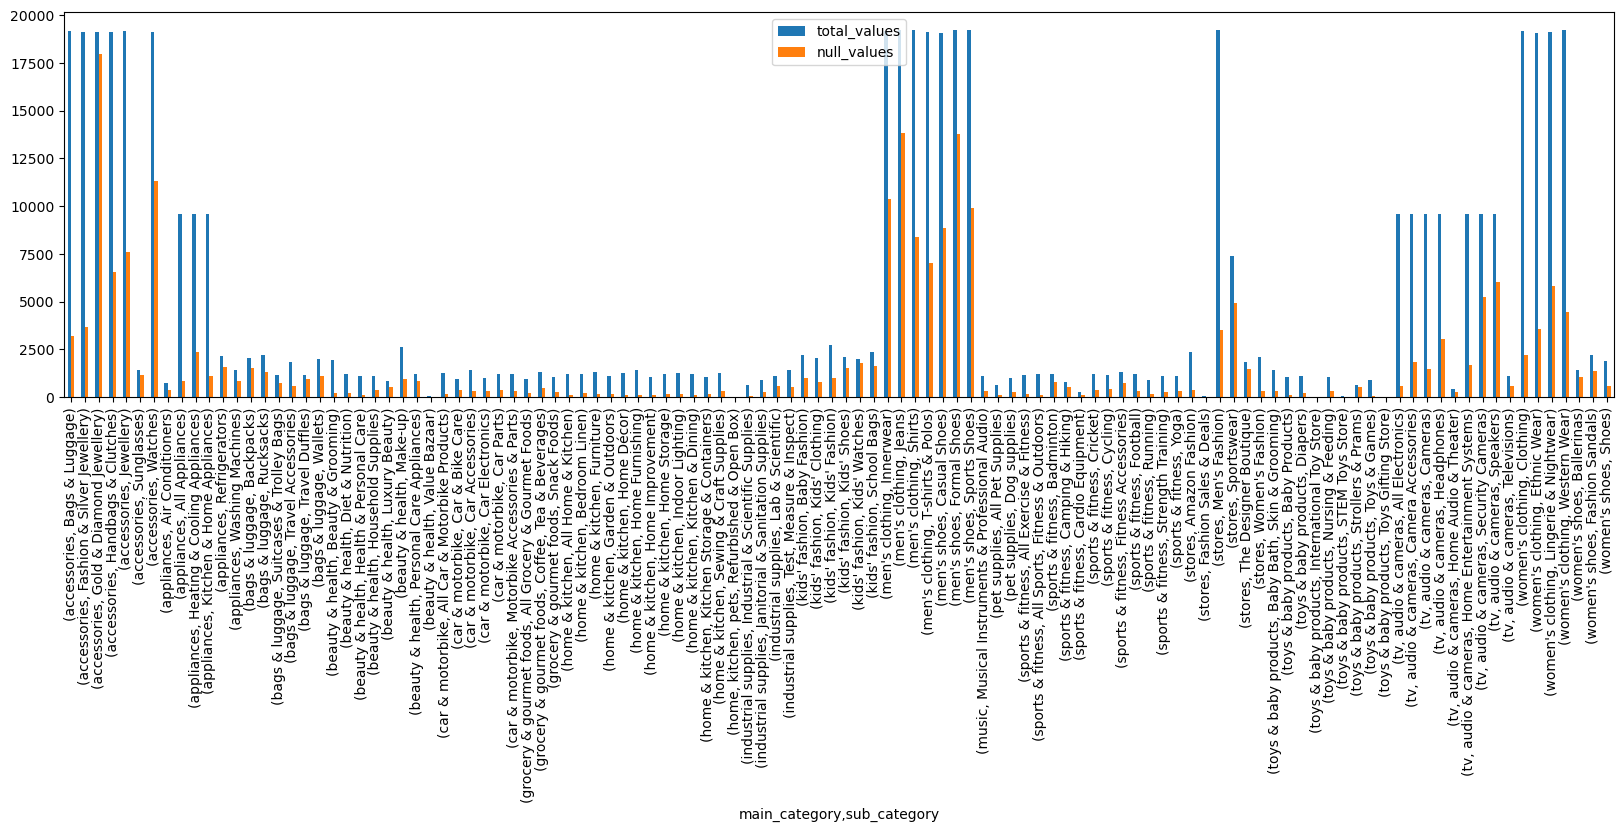

In [19]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,500))
compare_df[["total_values","null_values"]].plot(kind='bar',figsize=(20,5))

In [20]:
#deleting all null values and non numeric values from last 4 columns

df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

### Cleaning 'ratings' col

In [21]:
df.ratings.unique()

array(['4.2', '4', '4.1', '4.3', '3.9', '3.8', '3.5', '4.6', '3.3', '3.4',
       '3.7', '2.9', '5', '4.4', '3.6', '2.7', '4.5', '3', '3.1', '4.8',
       '4.7', '3.2', '2.5', '1', '2.6', '2.8', '1.7', 'Get', '1.8', '2.4',
       '4.9', '2.2', '1.6', '1.9', '2.3', '2', '1.4', '2.1', 'FREE',
       '1.2', '1.3', '1.5', '₹65', '1.1', '₹70', '₹100', '₹99', '₹2.99'],
      dtype=object)

In [22]:
df.drop( df[df.ratings.isin(['Get','FREE','₹65', '₹70', '₹100', '₹99'])].index ,axis=0,inplace=True)

In [23]:
df.ratings=df.ratings.str.replace(",|₹",'',regex=True).astype('float32')

### Cleaning 'no_of_ratings' col

In [24]:
#Finding non numeric rows and deleting them

df[ ~df.no_of_ratings.str.replace(",|₹",'',regex=True).str.isnumeric() ]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
297582,"Macaso Adjustable Eyewear Retainer, Universal ...",accessories,Sunglasses,https://m.media-amazon.com/images/I/51LYBvurF0...,https://www.amazon.in/Adjustable-Eyewear-Retai...,2.99,Usually dispatched in 6 to 7 days.,₹681,"₹1,022"
297583,Macaso Heart Shaped Sunglasses Women Party Eye...,accessories,Sunglasses,https://m.media-amazon.com/images/I/41HRO+KGK1...,https://www.amazon.in/Macaso-Sunglasses-Eyewea...,2.99,Usually dispatched in 6 to 7 days.,₹696,"₹1,043"


In [25]:
df.drop(df[ ~df.no_of_ratings.str.replace(",|₹",'',regex=True).str.isnumeric() ].index,axis=0,inplace=True)

In [26]:
df.no_of_ratings=df.no_of_ratings.str.replace(",|₹",'',regex=True).astype('int32')

### Cleaning 'discount_price' col

In [27]:
df.discount_price=df.discount_price.str.replace(",|₹",'',regex=True).astype('float32')

### Cleaning 'actual_price' col

In [28]:
df.actual_price=df.actual_price.str.replace(",|₹",'',regex=True).astype('float32')

In [29]:
#Some outlier items has price upto 10^9, drop it
df.drop( df[df.actual_price>9000000].index , axis=0 ,inplace=True) 

In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
df['discount%']= (df.actual_price-df.discount_price)/df.actual_price *100 

In [32]:
numeric_cols+=['discount%']

In [33]:
numeric_cols

['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount%']

In [34]:
df[numeric_cols]

,ratings,no_of_ratings,discount_price,actual_price,discount%
0,4.2,2255,32999.0,58990.0,44.060009
1,4.2,2948,46490.0,75990.0,38.820900
2,4.2,1206,34490.0,61990.0,44.361992
3,4.0,69,37990.0,68990.0,44.934048
4,4.1,630,34490.0,67790.0,49.122288
...,...,...,...,...,...
334956,4.6,6,711.0,999.0,28.828829
334957,3.2,9,3449.0,4599.0,25.005436
334958,2.0,2,1199.0,1999.0,40.020008
334959,4.0,1,1199.0,1999.0,40.020008


In [37]:
#Saving cleaned data
df.to_csv("cleaned_amazon_products.csv",index=False)

## Clustering Analysis

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [34]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[numeric_cols])

In [35]:
def optimal_kmeans(dataset, start=2, end=10, silhouette=False):
    km_ss=[]
    n_clu=[]
    inertia=[]

    for no_clusters in range(start,end):

        #Clustering
        k_means=KMeans(no_clusters,n_init=10,random_state=47)
        labels=k_means.fit_predict(dataset)

        # Calcualte model performance
        if silhouette:
            silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
            km_ss.append(silhouette_avg)
            
        inertia_score = round(k_means.inertia_, 2)

        # Append score to lists
        n_clu.append(no_clusters)
        inertia.append(inertia_score)

        if silhouette:
            print("No. Clusters: {}, Silhouette Score(SS): {}, Inertia: {}".format(no_clusters,silhouette_avg,inertia_score) )
        else:
            print("No. Clusters: {}, Inertia: {}".format(no_clusters,inertia_score) )
        
        # Plot graph at the end of loop
        if no_clusters == end - 1:
            plt.figure(figsize=(9,6))
            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)
            
            if silhouette:
                plt.subplot(2, 1, 2)
                plt.title('Silhouette Score')
                sns.pointplot(x=n_clu, y=km_ss)
                plt.tight_layout()
                
            plt.show()

No. Clusters: 2, Inertia: 1325210.44
No. Clusters: 3, Inertia: 1084388.49
No. Clusters: 4, Inertia: 875177.04
No. Clusters: 5, Inertia: 730234.37
No. Clusters: 6, Inertia: 625117.7
No. Clusters: 7, Inertia: 560694.33
No. Clusters: 8, Inertia: 498715.67
No. Clusters: 9, Inertia: 445930.57


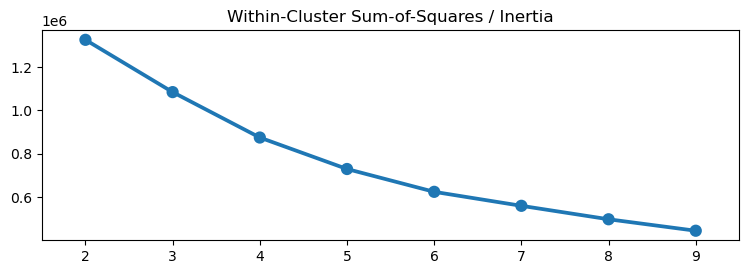

In [36]:
optimal_kmeans(df_scaled, start=2, end=10)

In [37]:
no_clusters=6
k_means=KMeans(no_clusters,n_init=10,random_state=47)
labels=k_means.fit_predict(df_scaled)

In [38]:
df['full_labels']=labels

In [39]:
df.full_labels.value_counts()

0    174420
4    109099
1     46422
2      4513
3       339
5       168
Name: full_labels, dtype: int64

In [40]:
df_avg=df[numeric_cols+['full_labels']].groupby(['full_labels']).mean()
df_avg

,ratings,no_of_ratings,discount_price,actual_price,discount%
full_labels,,,,,
0,3.995363,609.709557,775.839478,2319.762695,65.249466
1,2.480440,28.332903,1007.882874,2232.665771,54.881500
2,4.090583,1176.229781,35866.226562,52352.257812,29.584070
3,4.179941,221987.525074,2006.583496,4267.510254,50.597080
4,4.079384,896.069240,2002.544189,2804.372803,27.346594
5,4.251191,177.726190,155189.484375,219849.765625,26.814692


In [41]:
#df.drop([139740],axis=0)

In [42]:
df_scaled=pd.DataFrame(df_scaled,columns=numeric_cols)
df_scaled['full_labels']=df['full_labels']

In [43]:
def snake_plot(df):
    '''
    Transform dataframe and plot snakeplot
    '''

    # Melt data into long format
    df_melt=pd.melt(df[numeric_cols+['full_labels']].reset_index(),
                        id_vars=['full_labels'],
                        value_vars=numeric_cols,
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt,x='Metric', y='Value', hue='full_labels')
    print(df_melt)
    

         full_labels     Metric     Value
0                  2    ratings  0.511328
1                  2    ratings  0.511328
2                  2    ratings  0.511328
3                  2    ratings  0.246134
4                  2    ratings  0.378731
...              ...        ...       ...
1674800            4  discount% -1.030236
1674801            4  discount% -1.208278
1674802            1  discount% -0.509100
1674803            4  discount% -0.509100
1674804            4  discount% -1.440648

[1674805 rows x 3 columns]


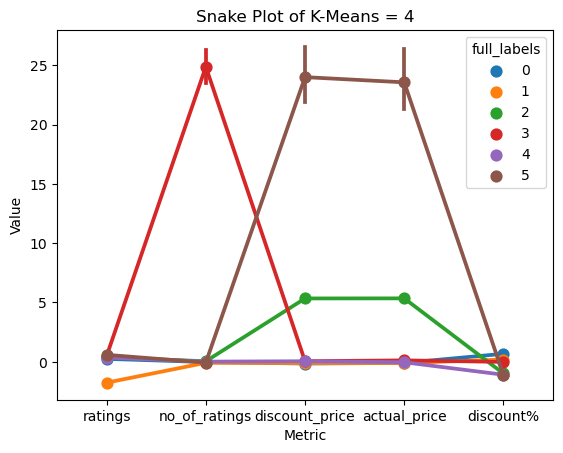

In [44]:
#plt.figure(figsize=(20,10))
#plt.subplot(1, 1, 1)
plt.title('Snake Plot of K-Means = 4')
snake_plot(df_scaled)

In [45]:
%%time
#import time
#s=time.time()
#silhouette_score(df_scaled,labels)
#e=time.time()
#print(e-s)

CPU times: user 5 µs, sys: 4 µs, total: 9 µs
Wall time: 19.1 µs


In [46]:
df.sub_category.value_counts()

Clothing                      16940
Bags & Luggage                15961
Men's Fashion                 15615
Ethnic Wear                   15476
Fashion & Silver Jewellery    15020
                              ...  
STEM Toys Store                  43
Fashion Sales & Deals            36
Toys Gifting Store               21
Refurbished & Open Box           12
International Toy Store           4
Name: sub_category, Length: 112, dtype: int64

In [47]:
sub_categories=df.sub_category.unique().tolist()

In [48]:
df[df.sub_category==sub_categories[0]][numeric_cols].drop(["discount_price","actual_price","discount%"],axis=1)

,ratings,no_of_ratings
0,4.2,2255
1,4.2,2948
2,4.2,1206
3,4.0,69
4,4.1,630
...,...,...
316,1.0,2
317,5.0,2
318,1.8,4
319,1.0,1


No. Clusters: 2, Silhouette Score(SS): 0.874, Inertia: 36092367.02
No. Clusters: 3, Silhouette Score(SS): 0.833, Inertia: 15316481.54
No. Clusters: 4, Silhouette Score(SS): 0.779, Inertia: 7989260.42
No. Clusters: 5, Silhouette Score(SS): 0.778, Inertia: 5224959.78
No. Clusters: 6, Silhouette Score(SS): 0.763, Inertia: 3681179.3
No. Clusters: 7, Silhouette Score(SS): 0.764, Inertia: 2289047.21
No. Clusters: 8, Silhouette Score(SS): 0.766, Inertia: 1602898.07
No. Clusters: 9, Silhouette Score(SS): 0.76, Inertia: 1162773.47


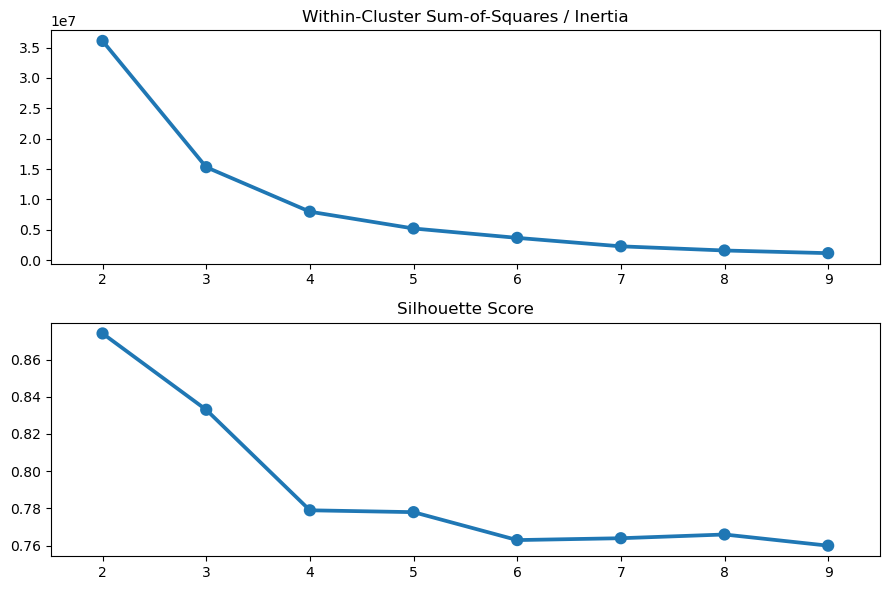

In [49]:
optimal_kmeans(df[df.sub_category==sub_categories[0]][numeric_cols].drop(["discount_price","actual_price","discount%"],axis=1),silhouette=True)

In [50]:
df_scaled.iloc[df[df.sub_category==sub_categories[0]][numeric_cols].index,:].drop(["discount_price","actual_price","discount%"],axis=1)

,ratings,no_of_ratings,full_labels
0,0.511328,0.157590,2
1,0.511328,0.235534,2
2,0.511328,0.039605,2
3,0.246134,-0.088277,2
4,0.378731,-0.025179,2
...,...,...,...
316,-3.731785,-0.095813,2
317,1.572107,-0.095813,2
318,-2.671006,-0.095588,2
319,-3.731785,-0.095925,2


In [51]:
#df_scaled.drop('full_labels',axis=1,inplace=True)

In [52]:
no_clusters=4
k_means=KMeans(no_clusters,n_init=10,random_state=47)
labels=k_means.fit_predict(df_scaled.iloc[df[df.sub_category==sub_categories[0]][numeric_cols].drop(["discount_price","actual_price","discount%"],axis=1).index,:])

In [53]:
df_scaled.iloc[df[df.sub_category==sub_categories[0]][numeric_cols].drop(["discount_price","actual_price","discount%"],axis=1).index,:]

,ratings,no_of_ratings,discount_price,actual_price,discount%,full_labels
0,0.511328,0.157590,4.885457,6.062023,-0.320971,2
1,0.511328,0.235534,6.995243,7.910887,-0.564939,2
2,0.511328,0.039605,5.118626,6.388293,-0.306909,2
3,0.246134,-0.088277,5.665973,7.149590,-0.280270,2
4,0.378731,-0.025179,5.118626,7.019082,-0.085238,2
...,...,...,...,...,...,...
316,-3.731785,-0.095813,6.339991,7.205056,-0.550233,2
317,1.572107,-0.095813,5.509588,6.170780,-0.587346,2
318,-2.671006,-0.095588,7.542590,7.149590,-1.090242,2
319,-3.731785,-0.095925,7.073435,5.126715,-2.058495,2


In [54]:
#df_scaled.iloc[df[df.sub_category==sub_categories[0]][numeric_cols]]

In [55]:
df_sub=pd.concat( [ df[df.sub_category==sub_categories[0]][numeric_cols] ,pd.Series(labels,name='labels') ] ,axis=1)

In [56]:
df_sub.groupby('labels').mean()

,ratings,no_of_ratings,discount_price,actual_price,discount%
labels,,,,,
0,3.898913,281.228261,35640.726562,51836.832031,29.799112
1,3.493333,109.800000,3457.266602,5406.466797,37.901611
2,3.906931,291.861386,48367.296875,71225.046875,31.151848
3,3.885714,10.619048,76565.093750,90540.476562,15.021010


In [57]:
pd.concat([df[df.sub_category==sub_categories[0]] ,pd.Series(labels,name='labels') ],axis=1).query("labels == 2 ")

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount%,full_labels,labels
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,38.820900,2,2
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0,44.934048,2,2
7,Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31IXlxIPsO...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.3,1494,39990.0,67990.0,41.182526,2,2
9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51WQ3nWF0v...,https://www.amazon.in/Voltas-Inverter-Split-Co...,4.0,801,37999.0,73990.0,48.643059,2,2
11,Daikin 1.5 Ton 5 Star Inverter Split AC (Coppe...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41BgAG0qRa...,https://www.amazon.in/Daikin-Inverter-Copper-F...,4.1,730,44990.0,67200.0,33.050598,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
301,Electrolux 1.5 Ton 5 Star Convertible Inverter...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51pmfuuPy0...,https://www.amazon.in/Electrolux-Convertible-A...,3.8,4,47990.0,73990.0,35.139881,2,2
304,Electrolux 1.8 Ton 3 Star Inverter Split Air C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/5127NZNfVS...,https://www.amazon.in/Electrolux-Conditioner-F...,5.0,1,50990.0,83990.0,39.290394,2,2
315,Samsung 1.5 Ton 3 Star Inverter Split AC (Allo...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71SbooADHz...,https://www.amazon.in/Samsung-Inverter-Split-A...,3.0,2,53914.0,56000.0,3.725000,2,2
316,Haier 1.5 Ton 3 Star Inverter Split Air Condit...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/61YeBAWmP3...,https://www.amazon.in/Haier-Inverter-Condition...,1.0,2,42300.0,69500.0,39.136688,2,2
